# **Aula 2**

O objetivo desta atividade é explorar as medidas estatísticas apresentadas durante a aula usando o *dataset* sugerido abaixo.

Fonte: [Salary Prediction dataset](https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer)

**Descrição do *dataset***

This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

**Columns:**

> **Age:** This column represents the age of each employee in years. The values in this column are numeric.
>
> **Gender:** This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.
>
> **Education Level:** This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.
>
> **Job Title:** This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.
>
> **Years of Experience:** This column represents the number of years of work experience of each employee. The values in this column are numeric.
>
> **Salary:** This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.


Escolha pelo menos 1 coluna para calcular as medidas, e explore também as visualizações que abordamos na aula.

> - Amplitude;
>
> - Intervalo interquartil;
>
> - Variância;
>
> - Desvio padrão;
>
> - Simetria;
>
> - Correlação entre duas variáveis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data.csv')

In [ ]:
amplitude = df['Salary'].max() - df['Salary'].min()
print(f'Amplitude: {amplitude}')

Amplitude: 249650.0


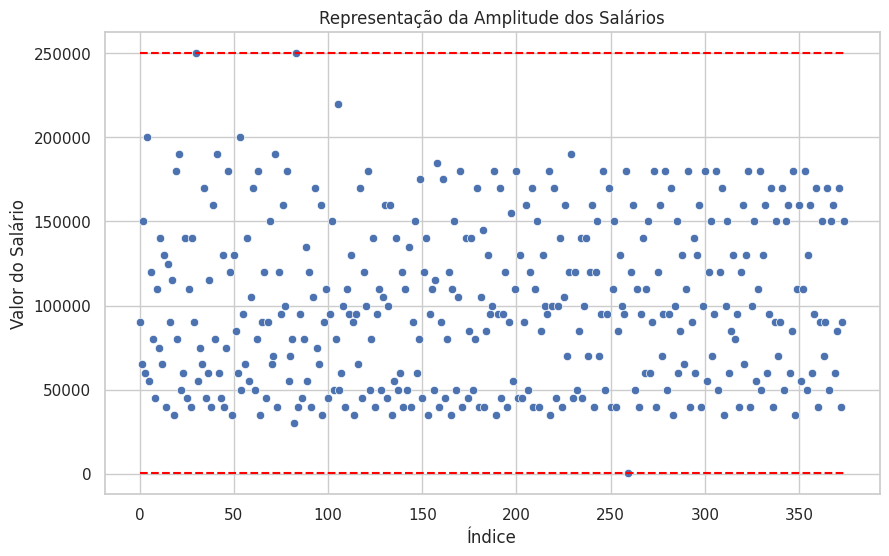

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Salary'])

plt.hlines(y=df['Salary'].min(), xmin=df.index.min(), xmax=df.index.max(), color='red', linestyle='dashed')
plt.hlines(y=df['Salary'].max(), xmin=df.index.min(), xmax=df.index.max(), color='red', linestyle='dashed')

plt.xlabel('Índice')
plt.ylabel('Valor do Salário')
plt.title('Representação da Amplitude dos Salários')

plt.show()

In [13]:
iqr = df['Salary'].quantile(0.75) - df['Salary'].quantile(0.25)
print(f'Intervalo Interquartil: {iqr}')

Intervalo Interquartil: 85000.0


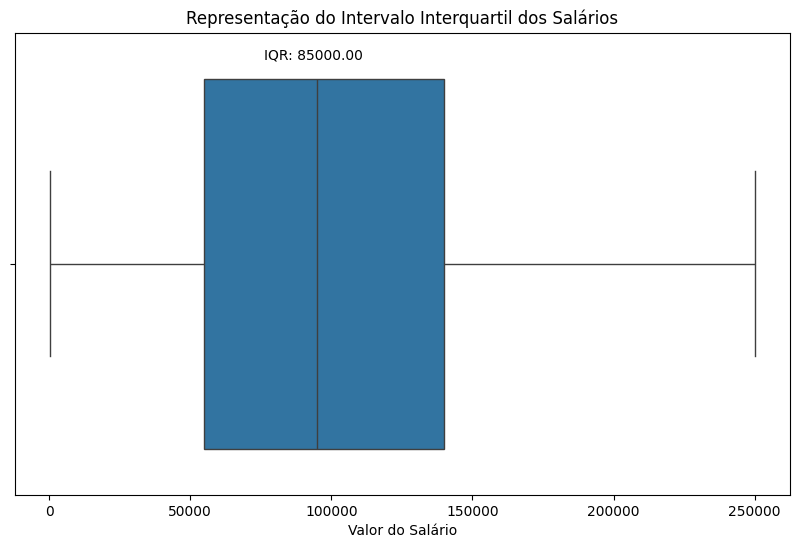

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Salary'])

plt.text(0.385, 0.95, f'IQR: {iqr:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
plt.title(f'Representação do Intervalo Interquartil dos Salários')
plt.xlabel('Valor do Salário')

plt.show()

In [11]:
variancia = df['Salary'].var().round(2)
print(f'Variância: {variancia}')

Variância: 2327098900.73


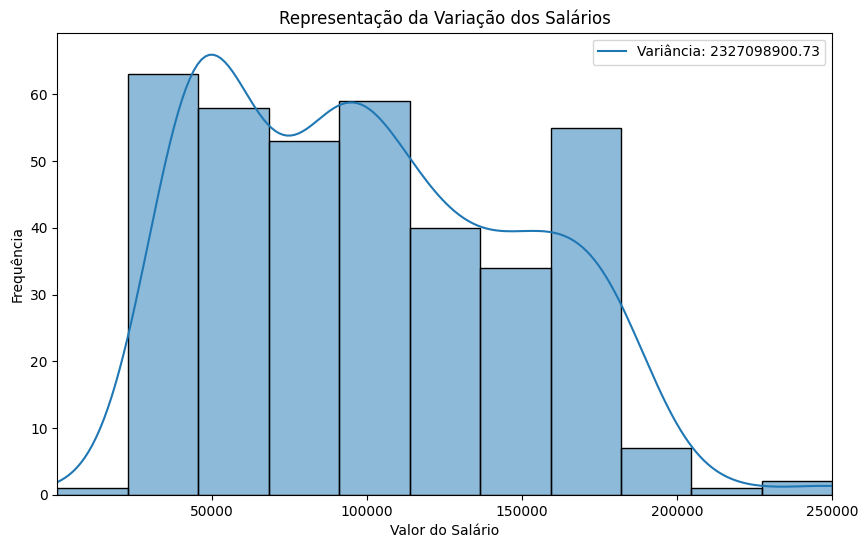

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True)

plt.title('Representação da Variação dos Salários')
plt.xlabel('Valor do Salário')
plt.ylabel('Frequência')

plt.axvline(variancia, label=f'Variância: {variancia}')
plt.xlim(left=min(df['Salary']), right=max(df['Salary']))
plt.legend()

plt.show()

In [16]:
desvio_padrao = df['Salary'].std().round(2)
print(f'Desvio Padrão: {desvio_padrao}')

Desvio Padrão: 48240.01


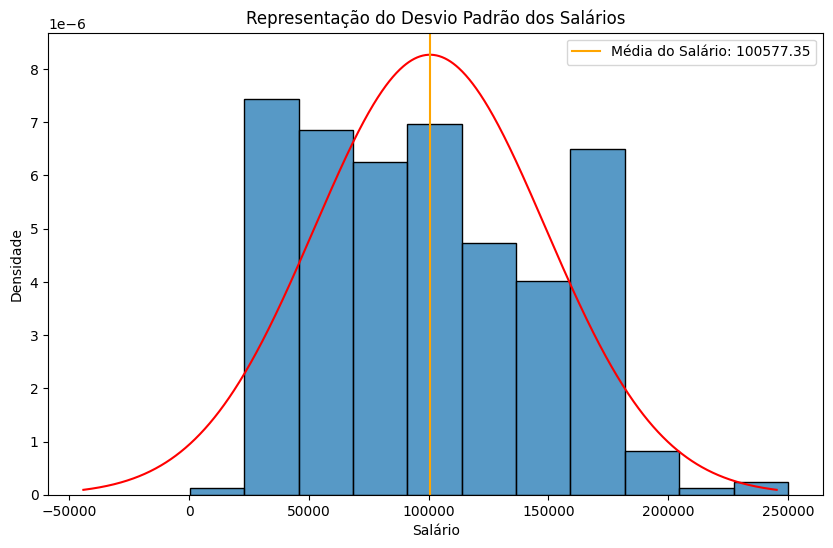

In [17]:
media_salario = df['Salary'].mean()
desvio_padrao = df['Salary'].std()

plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], stat='density')

x = np.linspace(media_salario - 3*desvio_padrao, media_salario + 3*desvio_padrao, 1000)
y = (1/(desvio_padrao * np.sqrt(2*np.pi))) * np.exp(-0.5*((x - media_salario)/desvio_padrao)**2)

plt.plot(x, y, color='red')
plt.axvline(media_salario, color='orange', label=f'Média do Salário: {media_salario:.2f}')

plt.xlabel('Salário')
plt.ylabel('Densidade')
plt.title('Representação do Desvio Padrão dos Salários')
plt.legend()

plt.show()

In [ ]:
simetria = df['Salary'].skew().round(3)
print(f'Simetria: {simetria}')

Simetria: 0.401


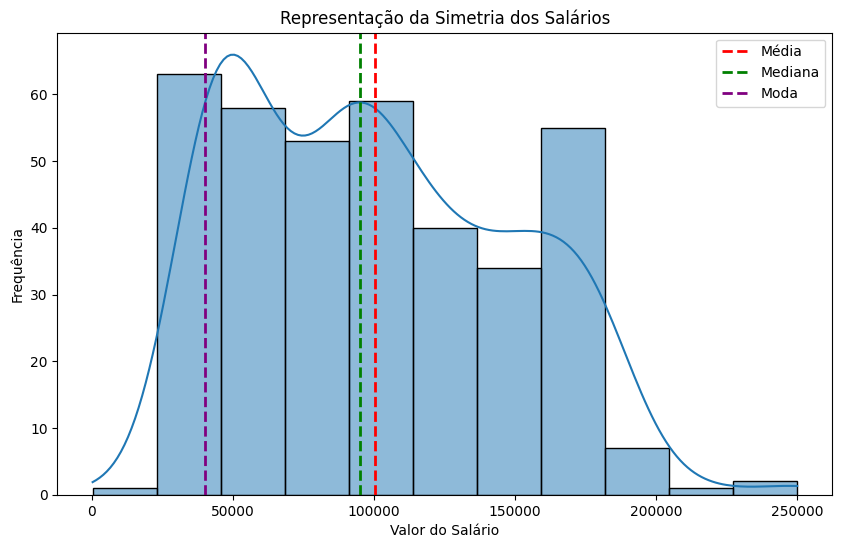

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True)

plt.title('Representação da Simetria dos Salários')
plt.xlabel('Valor do Salário')
plt.ylabel('Frequência')

plt.axvline(df['Salary'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Média')
plt.axvline(df['Salary'].median(), color='green', linestyle='dashed', linewidth=2, label=f'Mediana')
plt.axvline(df['Salary'].mode().iloc[0], color='purple', linestyle='dashed', linewidth=2, label=f'Moda')

plt.legend()
plt.show()

In [18]:
correlacao_sal_exp = df[['Salary', 'Years of Experience']].corr(numeric_only=True).iloc[0, 1]

if correlacao_sal_exp == -1:
    print("Correlação perfeita negativa.")
elif -1 < correlacao_sal_exp <= -0.9:
    print("Correlação muito forte negativa.")
elif -0.9 < correlacao_sal_exp <= -0.7:
    print("Correlação forte negativa.")
elif -0.7 < correlacao_sal_exp <= -0.5:
    print("Correlação moderada negativa.")
elif -0.5 < correlacao_sal_exp <= -0.3:
    print("Correlação fraca negativa.")
elif -0.3 < correlacao_sal_exp < 0:
    print("Correlação desprezível negativa.")
elif correlacao_sal_exp == 0:
    print("Sem correlação linear.")
elif 0 < correlacao_sal_exp < 0.3:
    print("Correlação desprezível positiva.")
elif 0.3 <= correlacao_sal_exp < 0.5:
    print("Correlação fraca positiva.")
elif 0.5 <= correlacao_sal_exp < 0.7:
    print("Correlação moderada positiva.")
elif 0.7 <= correlacao_sal_exp < 0.9:
    print("Correlação forte positiva.")
elif 0.9 <= correlacao_sal_exp < 1:
    print("Correlação muito forte positiva.")
elif correlacao_sal_exp == 1:
    print("Correlação perfeita positiva.")
else:
    print("Valor de correlação não reconhecido.")

Correlação muito forte positiva.


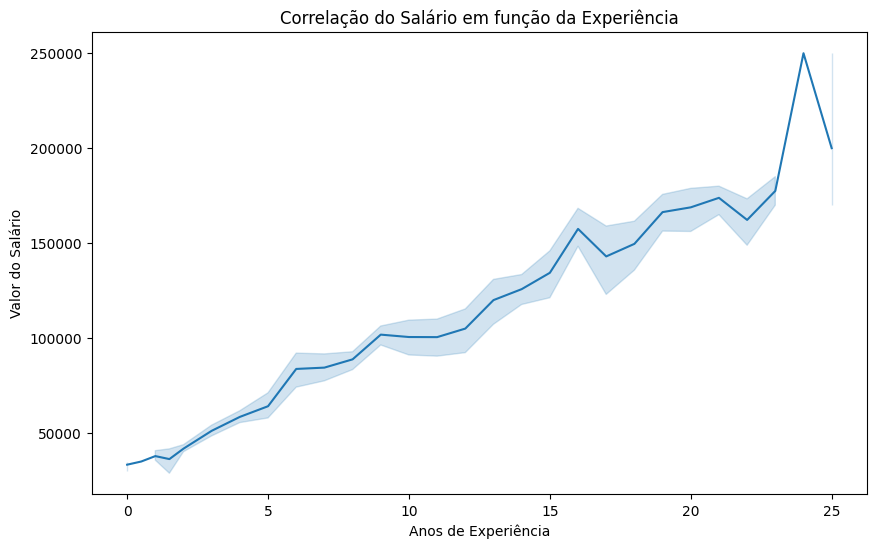

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Years of Experience'], y=df['Salary'])

plt.ylabel('Valor do Salário')
plt.xlabel('Anos de Experiência')
plt.title('Correlação do Salário em função da Experiência')

plt.show()